## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

## Data Preparation

In [4]:
from pandas import read_csv
from matplotlib import pyplot
dataset = read_csv('weather.csv', header=0, index_col=0)

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
dataset.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
hyderabad,2021-01-01,24.7,17.8,21.1,24.7,17.8,21.1,17.2,79.4,0.0,0.0,0.0,0,0,0,33.8,12.2,107.2,1016.0,36.5,3.0,140.6,12.2,6,0.0,2021-01-01 06:46:27,2021-01-01 17:53:02,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,F3069,43083099999,43128599999,43128099999..."
hyderabad,2021-01-02,26.7,15.0,20.8,26.7,15.0,20.8,16.2,76.7,0.0,0.0,0.0,0,0,0,30.6,9.5,116.6,1016.4,9.1,3.3,149.0,12.9,6,0.0,2021-01-02 06:46:47,2021-01-02 17:53:38,0.61,Clear,Clear conditions throughout the day.,clear-day,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."
hyderabad,2021-01-03,26.2,16.0,20.7,26.2,16.0,20.7,15.5,74.4,0.0,0.0,0.0,0,0,0,32.8,11.2,112.5,1014.8,32.8,3.5,131.2,11.4,5,0.0,2021-01-03 06:47:07,2021-01-03 17:54:14,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."
hyderabad,2021-01-04,27.0,17.0,21.5,26.8,17.0,21.5,14.3,67.5,0.0,0.0,0.0,0,0,0,42.8,17.8,115.7,1014.5,13.4,4.4,161.5,14.0,6,0.0,2021-01-04 06:47:25,2021-01-04 17:54:50,0.68,Clear,Clear conditions throughout the day.,clear-day,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."
hyderabad,2021-01-05,29.0,18.0,22.9,29.0,18.0,22.9,17.1,72.5,0.0,0.0,0.0,0,0,0,28.8,10.6,123.7,1015.0,30.0,4.2,155.4,13.5,6,0.0,2021-01-05 06:47:42,2021-01-05 17:55:27,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, hyderabad to hyderabad
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          1338 non-null   object 
 1   tempmax           1338 non-null   float64
 2   tempmin           1338 non-null   float64
 3   temp              1338 non-null   float64
 4   feelslikemax      1338 non-null   float64
 5   feelslikemin      1338 non-null   float64
 6   feelslike         1338 non-null   float64
 7   dew               1338 non-null   float64
 8   humidity          1338 non-null   float64
 9   precip            1338 non-null   float64
 10  precipprob        1338 non-null   float64
 11  precipcover       1338 non-null   float64
 12  preciptype        1338 non-null   object 
 13  snow              1338 non-null   int64  
 14  snowdepth         1338 non-null   int64  
 15  windgust          1338 non-null   float64
 16  windspeed         1338 non-null   

In [8]:
for i in dataset.columns:
  print(dataset[i].nunique())
  print('/n')
  print(dataset[i].value_counts())
  print('/n')

1338
/n
datetime
2021-01-01    1
2023-06-18    1
2023-06-16    1
2023-06-15    1
2023-06-14    1
             ..
2022-03-22    1
2022-03-21    1
2022-03-20    1
2022-03-19    1
2024-08-30    1
Name: count, Length: 1338, dtype: int64
/n
173
/n
tempmax
29.9    35
29.0    32
30.9    29
30.0    29
31.0    27
        ..
40.1     1
39.6     1
26.4     1
22.9     1
25.3     1
Name: count, Length: 173, dtype: int64
/n
141
/n
tempmin
23.0    165
22.0    126
24.0    113
18.0     55
21.0     54
       ... 
24.8      1
14.7      1
14.2      1
13.6      1
21.8      1
Name: count, Length: 141, dtype: int64
/n
149
/n
temp
26.2    25
26.1    23
25.3    23
25.9    23
24.5    23
        ..
19.7     1
19.2     1
19.4     1
20.1     1
34.3     1
Name: count, Length: 149, dtype: int64
/n
193
/n
feelslikemax
29.2    18
30.2    17
29.3    17
29.1    17
35.1    16
        ..
43.0     1
26.4     1
22.9     1
44.8     1
25.3     1
Name: count, Length: 193, dtype: int64
/n
153
/n
feelslikemin
23.0    165
22.0   

Impute Preciptype-0  to no rain
convert uv index and severerisk to cat variables

\## Checking Seasonality

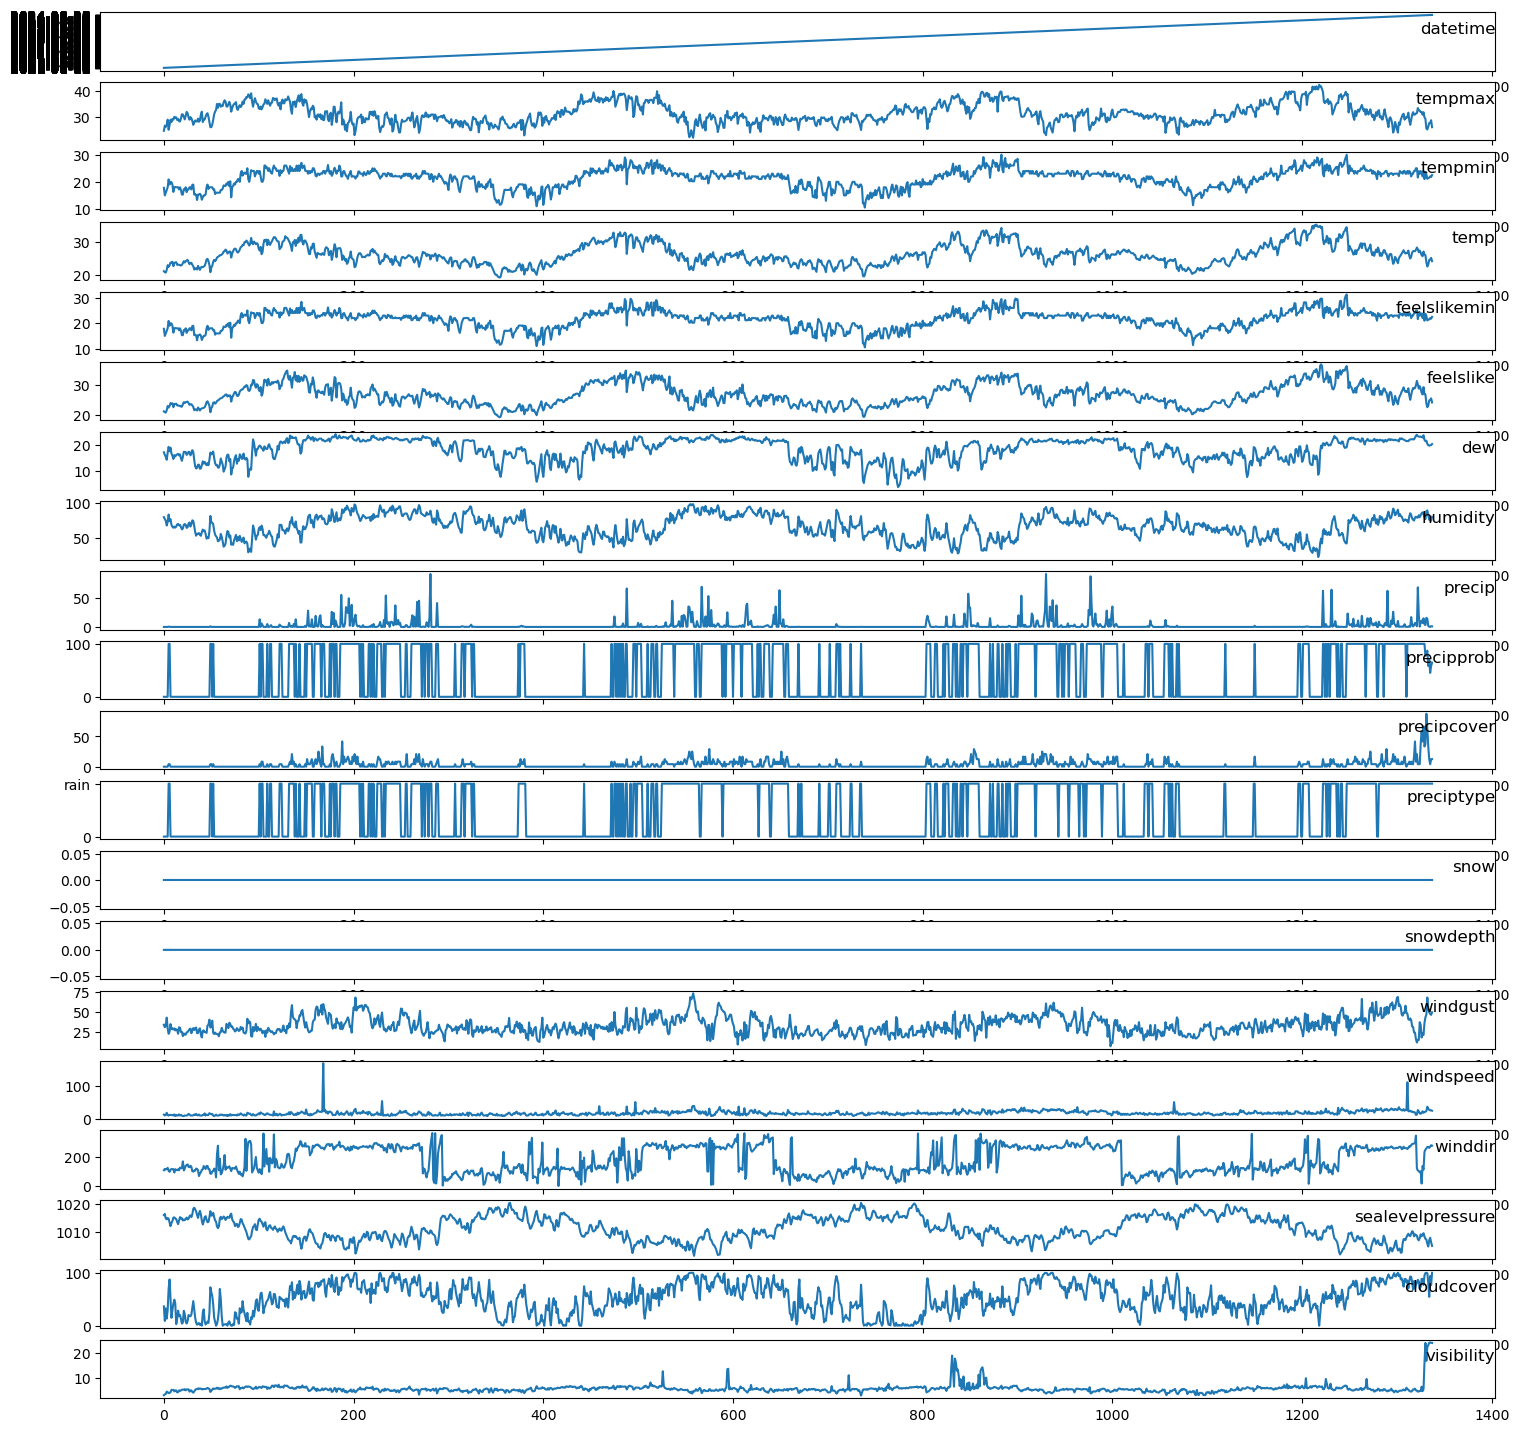

In [9]:
values = dataset.values
groups = [0, 1, 2, 3, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20]
i = 1
plt.figure(figsize=(18, 18))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [10]:
dataset.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [11]:
# 1. Drop the columns 'snow', 'snowdepth', and 'stations'
dataset = dataset.drop(columns=['snow', 'snowdepth', 'stations'])

# 2. Replace '0' in the 'preciptype' column with 'no rain'
dataset['preciptype'] = dataset['preciptype'].replace('0', 'no rain')

# 3. Convert 'uvindex' and 'severerisk' columns to categorical variables (as strings)
dataset['uvindex'] = dataset['uvindex'].astype(str)
dataset['severerisk'] = dataset['severerisk'].astype(str)

In [12]:
# Convert sunrise and sunset columns to datetime
dataset['sunrise'] = pd.to_datetime(dataset['sunrise'])
dataset['sunset'] = pd.to_datetime(dataset['sunset'])

# Calculate daylight hours
dataset['daylight_hours'] = (dataset['sunset'] - dataset['sunrise']).dt.total_seconds() / 3600  # Convert seconds to hours

In [13]:
dataset = dataset.drop(columns=['sunrise', 'sunset'])

In [14]:
dataset

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions,description,icon,daylight_hours
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
hyderabad,2021-01-01,24.7,17.8,21.1,24.7,17.8,21.1,17.2,79.4,0.0,0.0,0.00,no rain,33.8,12.2,107.2,1016.0,36.5,3.0,140.6,12.2,6,0.0,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,11.109722
hyderabad,2021-01-02,26.7,15.0,20.8,26.7,15.0,20.8,16.2,76.7,0.0,0.0,0.00,no rain,30.6,9.5,116.6,1016.4,9.1,3.3,149.0,12.9,6,0.0,0.61,Clear,Clear conditions throughout the day.,clear-day,11.114167
hyderabad,2021-01-03,26.2,16.0,20.7,26.2,16.0,20.7,15.5,74.4,0.0,0.0,0.00,no rain,32.8,11.2,112.5,1014.8,32.8,3.5,131.2,11.4,5,0.0,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,11.118611
hyderabad,2021-01-04,27.0,17.0,21.5,26.8,17.0,21.5,14.3,67.5,0.0,0.0,0.00,no rain,42.8,17.8,115.7,1014.5,13.4,4.4,161.5,14.0,6,0.0,0.68,Clear,Clear conditions throughout the day.,clear-day,11.123611
hyderabad,2021-01-05,29.0,18.0,22.9,29.0,18.0,22.9,17.1,72.5,0.0,0.0,0.00,no rain,28.8,10.6,123.7,1015.0,30.0,4.2,155.4,13.5,6,0.0,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,11.129167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hyderabad,2024-08-26,26.3,21.4,23.1,26.3,21.4,23.1,19.9,82.5,1.8,58.1,33.33,rain,55.1,30.6,264.6,1004.9,81.9,23.1,164.0,14.1,8,10.0,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,12.550000
hyderabad,2024-08-27,27.7,21.5,24.5,29.1,21.5,24.8,19.8,75.7,0.4,71.0,12.50,rain,49.7,27.0,259.1,1007.1,54.6,24.1,229.0,19.8,7,10.0,0.76,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,12.534722
hyderabad,2024-08-28,27.7,22.0,24.6,29.2,22.0,24.9,19.9,75.5,0.1,45.2,4.17,rain,47.5,25.2,267.5,1008.0,94.0,24.1,232.4,20.1,8,10.0,0.80,"Rain, Overcast",Cloudy skies throughout the day with afternoon...,rain,12.519444


In [15]:
dataset = dataset.drop(columns=['icon'])

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, hyderabad to hyderabad
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          1338 non-null   object 
 1   tempmax           1338 non-null   float64
 2   tempmin           1338 non-null   float64
 3   temp              1338 non-null   float64
 4   feelslikemax      1338 non-null   float64
 5   feelslikemin      1338 non-null   float64
 6   feelslike         1338 non-null   float64
 7   dew               1338 non-null   float64
 8   humidity          1338 non-null   float64
 9   precip            1338 non-null   float64
 10  precipprob        1338 non-null   float64
 11  precipcover       1338 non-null   float64
 12  preciptype        1338 non-null   object 
 13  windgust          1338 non-null   float64
 14  windspeed         1338 non-null   float64
 15  winddir           1338 non-null   float64
 16  sealevelpressure  1338 non-null   

In [17]:
dataset=dataset.reset_index(drop=True)

In [18]:
dataset

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions,description,daylight_hours
0,2021-01-01,24.7,17.8,21.1,24.7,17.8,21.1,17.2,79.4,0.0,0.0,0.00,no rain,33.8,12.2,107.2,1016.0,36.5,3.0,140.6,12.2,6,0.0,0.58,Partially cloudy,Partly cloudy throughout the day.,11.109722
1,2021-01-02,26.7,15.0,20.8,26.7,15.0,20.8,16.2,76.7,0.0,0.0,0.00,no rain,30.6,9.5,116.6,1016.4,9.1,3.3,149.0,12.9,6,0.0,0.61,Clear,Clear conditions throughout the day.,11.114167
2,2021-01-03,26.2,16.0,20.7,26.2,16.0,20.7,15.5,74.4,0.0,0.0,0.00,no rain,32.8,11.2,112.5,1014.8,32.8,3.5,131.2,11.4,5,0.0,0.65,Partially cloudy,Partly cloudy throughout the day.,11.118611
3,2021-01-04,27.0,17.0,21.5,26.8,17.0,21.5,14.3,67.5,0.0,0.0,0.00,no rain,42.8,17.8,115.7,1014.5,13.4,4.4,161.5,14.0,6,0.0,0.68,Clear,Clear conditions throughout the day.,11.123611
4,2021-01-05,29.0,18.0,22.9,29.0,18.0,22.9,17.1,72.5,0.0,0.0,0.00,no rain,28.8,10.6,123.7,1015.0,30.0,4.2,155.4,13.5,6,0.0,0.72,Partially cloudy,Partly cloudy throughout the day.,11.129167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,2024-08-26,26.3,21.4,23.1,26.3,21.4,23.1,19.9,82.5,1.8,58.1,33.33,rain,55.1,30.6,264.6,1004.9,81.9,23.1,164.0,14.1,8,10.0,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,12.550000
1334,2024-08-27,27.7,21.5,24.5,29.1,21.5,24.8,19.8,75.7,0.4,71.0,12.50,rain,49.7,27.0,259.1,1007.1,54.6,24.1,229.0,19.8,7,10.0,0.76,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,12.534722
1335,2024-08-28,27.7,22.0,24.6,29.2,22.0,24.9,19.9,75.5,0.1,45.2,4.17,rain,47.5,25.2,267.5,1008.0,94.0,24.1,232.4,20.1,8,10.0,0.80,"Rain, Overcast",Cloudy skies throughout the day with afternoon...,12.519444
1336,2024-08-29,28.8,21.8,25.1,30.5,21.8,25.5,20.0,74.2,1.2,58.1,12.50,rain,46.4,25.9,276.9,1006.4,76.9,24.1,243.0,21.2,7,10.0,0.83,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,12.503889


In [19]:
dataset.set_index('datetime', inplace=True)

In [20]:
dataset

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions,description,daylight_hours
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01,24.7,17.8,21.1,24.7,17.8,21.1,17.2,79.4,0.0,0.0,0.00,no rain,33.8,12.2,107.2,1016.0,36.5,3.0,140.6,12.2,6,0.0,0.58,Partially cloudy,Partly cloudy throughout the day.,11.109722
2021-01-02,26.7,15.0,20.8,26.7,15.0,20.8,16.2,76.7,0.0,0.0,0.00,no rain,30.6,9.5,116.6,1016.4,9.1,3.3,149.0,12.9,6,0.0,0.61,Clear,Clear conditions throughout the day.,11.114167
2021-01-03,26.2,16.0,20.7,26.2,16.0,20.7,15.5,74.4,0.0,0.0,0.00,no rain,32.8,11.2,112.5,1014.8,32.8,3.5,131.2,11.4,5,0.0,0.65,Partially cloudy,Partly cloudy throughout the day.,11.118611
2021-01-04,27.0,17.0,21.5,26.8,17.0,21.5,14.3,67.5,0.0,0.0,0.00,no rain,42.8,17.8,115.7,1014.5,13.4,4.4,161.5,14.0,6,0.0,0.68,Clear,Clear conditions throughout the day.,11.123611
2021-01-05,29.0,18.0,22.9,29.0,18.0,22.9,17.1,72.5,0.0,0.0,0.00,no rain,28.8,10.6,123.7,1015.0,30.0,4.2,155.4,13.5,6,0.0,0.72,Partially cloudy,Partly cloudy throughout the day.,11.129167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,26.3,21.4,23.1,26.3,21.4,23.1,19.9,82.5,1.8,58.1,33.33,rain,55.1,30.6,264.6,1004.9,81.9,23.1,164.0,14.1,8,10.0,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,12.550000
2024-08-27,27.7,21.5,24.5,29.1,21.5,24.8,19.8,75.7,0.4,71.0,12.50,rain,49.7,27.0,259.1,1007.1,54.6,24.1,229.0,19.8,7,10.0,0.76,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,12.534722
2024-08-28,27.7,22.0,24.6,29.2,22.0,24.9,19.9,75.5,0.1,45.2,4.17,rain,47.5,25.2,267.5,1008.0,94.0,24.1,232.4,20.1,8,10.0,0.80,"Rain, Overcast",Cloudy skies throughout the day with afternoon...,12.519444


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 2021-01-01 to 2024-08-30
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           1338 non-null   float64
 1   tempmin           1338 non-null   float64
 2   temp              1338 non-null   float64
 3   feelslikemax      1338 non-null   float64
 4   feelslikemin      1338 non-null   float64
 5   feelslike         1338 non-null   float64
 6   dew               1338 non-null   float64
 7   humidity          1338 non-null   float64
 8   precip            1338 non-null   float64
 9   precipprob        1338 non-null   float64
 10  precipcover       1338 non-null   float64
 11  preciptype        1338 non-null   object 
 12  windgust          1338 non-null   float64
 13  windspeed         1338 non-null   float64
 14  winddir           1338 non-null   float64
 15  sealevelpressure  1338 non-null   float64
 16  cloudcover        1338 non-null 

## Model Building

*   Label Encoding Categorical Variables
*   Scaling All Features
*   Building Model and Training
*   Evaluation



## Label Encoding Categorical Variables

In [22]:
X_num = dataset.select_dtypes(include=['float64'])
X_cat = dataset.select_dtypes(include=['object'])


In [23]:
X_num

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,moonphase,daylight_hours
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01,24.7,17.8,21.1,24.7,17.8,21.1,17.2,79.4,0.0,0.0,0.00,33.8,12.2,107.2,1016.0,36.5,3.0,140.6,12.2,0.58,11.109722
2021-01-02,26.7,15.0,20.8,26.7,15.0,20.8,16.2,76.7,0.0,0.0,0.00,30.6,9.5,116.6,1016.4,9.1,3.3,149.0,12.9,0.61,11.114167
2021-01-03,26.2,16.0,20.7,26.2,16.0,20.7,15.5,74.4,0.0,0.0,0.00,32.8,11.2,112.5,1014.8,32.8,3.5,131.2,11.4,0.65,11.118611
2021-01-04,27.0,17.0,21.5,26.8,17.0,21.5,14.3,67.5,0.0,0.0,0.00,42.8,17.8,115.7,1014.5,13.4,4.4,161.5,14.0,0.68,11.123611
2021-01-05,29.0,18.0,22.9,29.0,18.0,22.9,17.1,72.5,0.0,0.0,0.00,28.8,10.6,123.7,1015.0,30.0,4.2,155.4,13.5,0.72,11.129167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,26.3,21.4,23.1,26.3,21.4,23.1,19.9,82.5,1.8,58.1,33.33,55.1,30.6,264.6,1004.9,81.9,23.1,164.0,14.1,0.75,12.550000
2024-08-27,27.7,21.5,24.5,29.1,21.5,24.8,19.8,75.7,0.4,71.0,12.50,49.7,27.0,259.1,1007.1,54.6,24.1,229.0,19.8,0.76,12.534722
2024-08-28,27.7,22.0,24.6,29.2,22.0,24.9,19.9,75.5,0.1,45.2,4.17,47.5,25.2,267.5,1008.0,94.0,24.1,232.4,20.1,0.80,12.519444


In [24]:

# Encode categorical features
label_encoders = {}
for col in X_cat.columns:
    le = LabelEncoder()
    X_cat[col] = le.fit_transform(X_cat[col])
    label_encoders[col] = le  # Store the label encoder for later use


In [25]:
X_cat

,preciptype,uvindex,severerisk,conditions,description
datetime,,,,,
2021-01-01,0,7,0,2,27
2021-01-02,0,7,0,0,3
2021-01-03,0,6,0,2,27
2021-01-04,0,7,0,0,3
2021-01-05,0,7,0,2,27
...,...,...,...,...,...
2024-08-26,1,9,1,4,20
2024-08-27,1,8,1,4,19
2024-08-28,1,9,1,3,9


## Scaling All Features

In [26]:
# Combine numerical and categorical features
X_combined = pd.concat([X_num, X_cat], axis=1)

# Normalize numerical data
scaler = MinMaxScaler()
X_combined_scaled = scaler.fit_transform(X_combined)


In [27]:
label_encoders

{'preciptype': LabelEncoder(),
 'uvindex': LabelEncoder(),
 'severerisk': LabelEncoder(),
 'conditions': LabelEncoder(),
 'description': LabelEncoder()}

In [28]:
# Function to create sequences for LSTM
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])  # Predicting the next time step's features
    return np.array(X), np.array(y)


In [29]:
X_combined

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,moonphase,daylight_hours,preciptype,uvindex,severerisk,conditions,description
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01,24.7,17.8,21.1,24.7,17.8,21.1,17.2,79.4,0.0,0.0,0.00,33.8,12.2,107.2,1016.0,36.5,3.0,140.6,12.2,0.58,11.109722,0,7,0,2,27
2021-01-02,26.7,15.0,20.8,26.7,15.0,20.8,16.2,76.7,0.0,0.0,0.00,30.6,9.5,116.6,1016.4,9.1,3.3,149.0,12.9,0.61,11.114167,0,7,0,0,3
2021-01-03,26.2,16.0,20.7,26.2,16.0,20.7,15.5,74.4,0.0,0.0,0.00,32.8,11.2,112.5,1014.8,32.8,3.5,131.2,11.4,0.65,11.118611,0,6,0,2,27
2021-01-04,27.0,17.0,21.5,26.8,17.0,21.5,14.3,67.5,0.0,0.0,0.00,42.8,17.8,115.7,1014.5,13.4,4.4,161.5,14.0,0.68,11.123611,0,7,0,0,3
2021-01-05,29.0,18.0,22.9,29.0,18.0,22.9,17.1,72.5,0.0,0.0,0.00,28.8,10.6,123.7,1015.0,30.0,4.2,155.4,13.5,0.72,11.129167,0,7,0,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,26.3,21.4,23.1,26.3,21.4,23.1,19.9,82.5,1.8,58.1,33.33,55.1,30.6,264.6,1004.9,81.9,23.1,164.0,14.1,0.75,12.550000,1,9,1,4,20
2024-08-27,27.7,21.5,24.5,29.1,21.5,24.8,19.8,75.7,0.4,71.0,12.50,49.7,27.0,259.1,1007.1,54.6,24.1,229.0,19.8,0.76,12.534722,1,8,1,4,19
2024-08-28,27.7,22.0,24.6,29.2,22.0,24.9,19.9,75.5,0.1,45.2,4.17,47.5,25.2,267.5,1008.0,94.0,24.1,232.4,20.1,0.80,12.519444,1,9,1,3,9


## Building the Model

In [30]:
# Define time steps (look-back period)
time_steps = 10

# Create sequences
X, y = create_sequences(X_combined_scaled, time_steps)

# Reshape X for LSTM input (samples, time_steps, features)
X = X.reshape((X.shape[0], time_steps, X.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(200,return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(200, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(X.shape[2]))  # Output layer matches the number of features
model.compile(optimizer='adam', loss='mse')


c:\Users\nvgop\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Training

In [31]:
# Train the model
model.fit(X, y, epochs=100)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.1373
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0442
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0397
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0364
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0351
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0326
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0318
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0311
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0302
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0290
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0274
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0276
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0267
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0268
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - lo

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 200)        │       181,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         5,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │           676 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,524,305 (5.81 MB)

 Trainable params: 508,101 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,016,204 (3.88 MB)

## Making Predictions and extracting features

In [33]:
# Make predictions
predictions = model.predict(X)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [34]:
type(predictions)

numpy.ndarray

In [35]:
res = pd.DataFrame(predictions,columns=X_combined.columns)

In [36]:
res

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,moonphase,daylight_hours,preciptype,uvindex,severerisk,conditions,description
0,28.492231,17.890446,22.864706,28.777250,18.353008,22.864614,17.410574,73.707649,-0.823972,7.108398,1.365748,28.988489,10.476009,103.463188,1015.174500,44.066223,4.491302,153.764221,13.221256,1.000474,11.098342,-0.005724,6.844976,-0.190563,2.153659,26.872824
1,28.419157,17.592873,22.741915,28.638309,18.093733,22.614399,17.038462,72.691078,-1.749500,2.571071,0.287352,27.164690,10.169349,95.934105,1015.223022,40.881641,4.352608,148.600555,12.775780,0.733160,11.040396,-0.060066,7.261026,-0.223634,1.987918,26.322184
2,28.603270,17.691832,23.005245,28.989218,18.097715,22.746956,17.247967,72.928017,-1.514470,1.555039,-0.538901,25.909388,9.974172,90.087845,1015.010376,35.009933,4.416790,151.077011,13.071373,0.322729,11.032870,-0.051189,7.735754,-0.272408,1.611433,21.921227
3,28.981358,17.165138,23.100716,29.133638,17.570856,22.649218,16.549160,70.818024,0.427905,0.506682,-0.797069,26.185312,11.232097,102.384689,1014.833557,20.742481,4.597608,162.970932,14.167567,-0.001653,11.045267,-0.052574,7.896802,-0.189625,0.686936,10.893847
4,29.311983,17.218086,23.325371,29.419371,17.316364,22.846500,15.927548,67.921387,1.760502,-3.224576,-0.777604,26.089296,10.528784,102.053612,1014.761963,12.588845,4.794478,162.554596,14.030588,0.075869,11.063468,-0.057626,7.319269,-0.206294,0.131209,5.096779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,27.162369,21.015615,24.033627,28.042212,21.460850,23.733719,18.629652,75.866425,2.469665,59.988182,30.153118,55.230061,31.292797,253.113937,1006.095154,76.117233,21.033934,180.041794,15.869210,0.708460,12.445267,0.945616,8.621809,0.827503,3.554838,16.391882
1324,28.343531,21.319115,24.957157,30.222580,21.461981,25.017263,18.462807,71.640549,0.009728,53.017689,17.840977,46.913338,29.211971,241.762283,1007.219055,68.445290,21.527039,227.443970,19.835234,0.772369,12.413453,0.965103,8.669857,0.822253,3.496862,16.961340
1325,28.739429,21.647125,25.420715,30.779049,21.683907,25.638119,18.797369,72.029320,0.828536,48.127586,12.912163,42.933132,28.329485,252.363647,1007.611328,67.278412,21.298519,231.120819,19.747631,0.802105,12.509314,0.874030,8.479423,0.880106,3.057932,12.744715
1326,28.294100,21.791470,25.476761,30.001772,22.411268,25.582924,19.498476,75.527710,0.724506,56.816093,15.102662,43.004211,29.447357,247.188995,1007.769409,77.347061,21.534487,196.496445,16.493626,0.823441,12.596509,0.895642,7.377668,0.832494,3.344342,13.891039


In [37]:

# Handling categorical predictions
for col_name in X_cat.columns:
    predicted_cat = res[col_name]

    # Round and clip to ensure values fall within the valid label range
    predicted_cat_rounded = np.round(predicted_cat).astype(int)
    predicted_cat_rounded = np.clip(predicted_cat_rounded, 0, len(label_encoders[col_name].classes_) - 1)

    # Convert back to original categorical labels
    predicted_labels = label_encoders[col_name].inverse_transform(predicted_cat_rounded)

    # Replace the predictions with the original categorical labels
    res[col_name] = predicted_labels

# The predictions array now contains the predicted values for both numerical and categorical features.


In [38]:
predicted_labels

array(['Partly cloudy throughout the day.',
       'Partly cloudy throughout the day with rain.',
       'Partly cloudy throughout the day with late afternoon rain.', ...,
       'Cloudy skies throughout the day with rain clearing later.',
       'Cloudy skies throughout the day with rain in the morning and afternoon.',
       'Cloudy skies throughout the day with early morning rain.'],
      dtype=object)

In [39]:
res

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,moonphase,daylight_hours,preciptype,uvindex,severerisk,conditions,description
0,28.492231,17.890446,22.864706,28.777250,18.353008,22.864614,17.410574,73.707649,-0.823972,7.108398,1.365748,28.988489,10.476009,103.463188,1015.174500,44.066223,4.491302,153.764221,13.221256,1.000474,11.098342,no rain,6,0.0,Partially cloudy,Partly cloudy throughout the day.
1,28.419157,17.592873,22.741915,28.638309,18.093733,22.614399,17.038462,72.691078,-1.749500,2.571071,0.287352,27.164690,10.169349,95.934105,1015.223022,40.881641,4.352608,148.600555,12.775780,0.733160,11.040396,no rain,6,0.0,Partially cloudy,Partly cloudy throughout the day with rain.
2,28.603270,17.691832,23.005245,28.989218,18.097715,22.746956,17.247967,72.928017,-1.514470,1.555039,-0.538901,25.909388,9.974172,90.087845,1015.010376,35.009933,4.416790,151.077011,13.071373,0.322729,11.032870,no rain,7,0.0,Partially cloudy,Partly cloudy throughout the day with late aft...
3,28.981358,17.165138,23.100716,29.133638,17.570856,22.649218,16.549160,70.818024,0.427905,0.506682,-0.797069,26.185312,11.232097,102.384689,1014.833557,20.742481,4.597608,162.970932,14.167567,-0.001653,11.045267,no rain,7,0.0,Overcast,Cloudy skies throughout the day with late afte...
4,29.311983,17.218086,23.325371,29.419371,17.316364,22.846500,15.927548,67.921387,1.760502,-3.224576,-0.777604,26.089296,10.528784,102.053612,1014.761963,12.588845,4.794478,162.554596,14.030588,0.075869,11.063468,no rain,6,0.0,Clear,Clearing in the afternoon with rain clearing l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,27.162369,21.015615,24.033627,28.042212,21.460850,23.733719,18.629652,75.866425,2.469665,59.988182,30.153118,55.230061,31.292797,253.113937,1006.095154,76.117233,21.033934,180.041794,15.869210,0.708460,12.445267,rain,8,10.0,"Rain, Partially cloudy",Cloudy skies throughout the day with storms po...
1324,28.343531,21.319115,24.957157,30.222580,21.461981,25.017263,18.462807,71.640549,0.009728,53.017689,17.840977,46.913338,29.211971,241.762283,1007.219055,68.445290,21.527039,227.443970,19.835234,0.772369,12.413453,rain,8,10.0,"Rain, Overcast",Cloudy skies throughout the day.
1325,28.739429,21.647125,25.420715,30.779049,21.683907,25.638119,18.797369,72.029320,0.828536,48.127586,12.912163,42.933132,28.329485,252.363647,1007.611328,67.278412,21.298519,231.120819,19.747631,0.802105,12.509314,rain,7,10.0,"Rain, Overcast",Cloudy skies throughout the day with rain clea...
1326,28.294100,21.791470,25.476761,30.001772,22.411268,25.582924,19.498476,75.527710,0.724506,56.816093,15.102662,43.004211,29.447357,247.188995,1007.769409,77.347061,21.534487,196.496445,16.493626,0.823441,12.596509,rain,6,10.0,"Rain, Overcast",Cloudy skies throughout the day with rain in t...


## Evaluation with Orginal Dataset

In [40]:
dataset_R=dataset[res.columns]

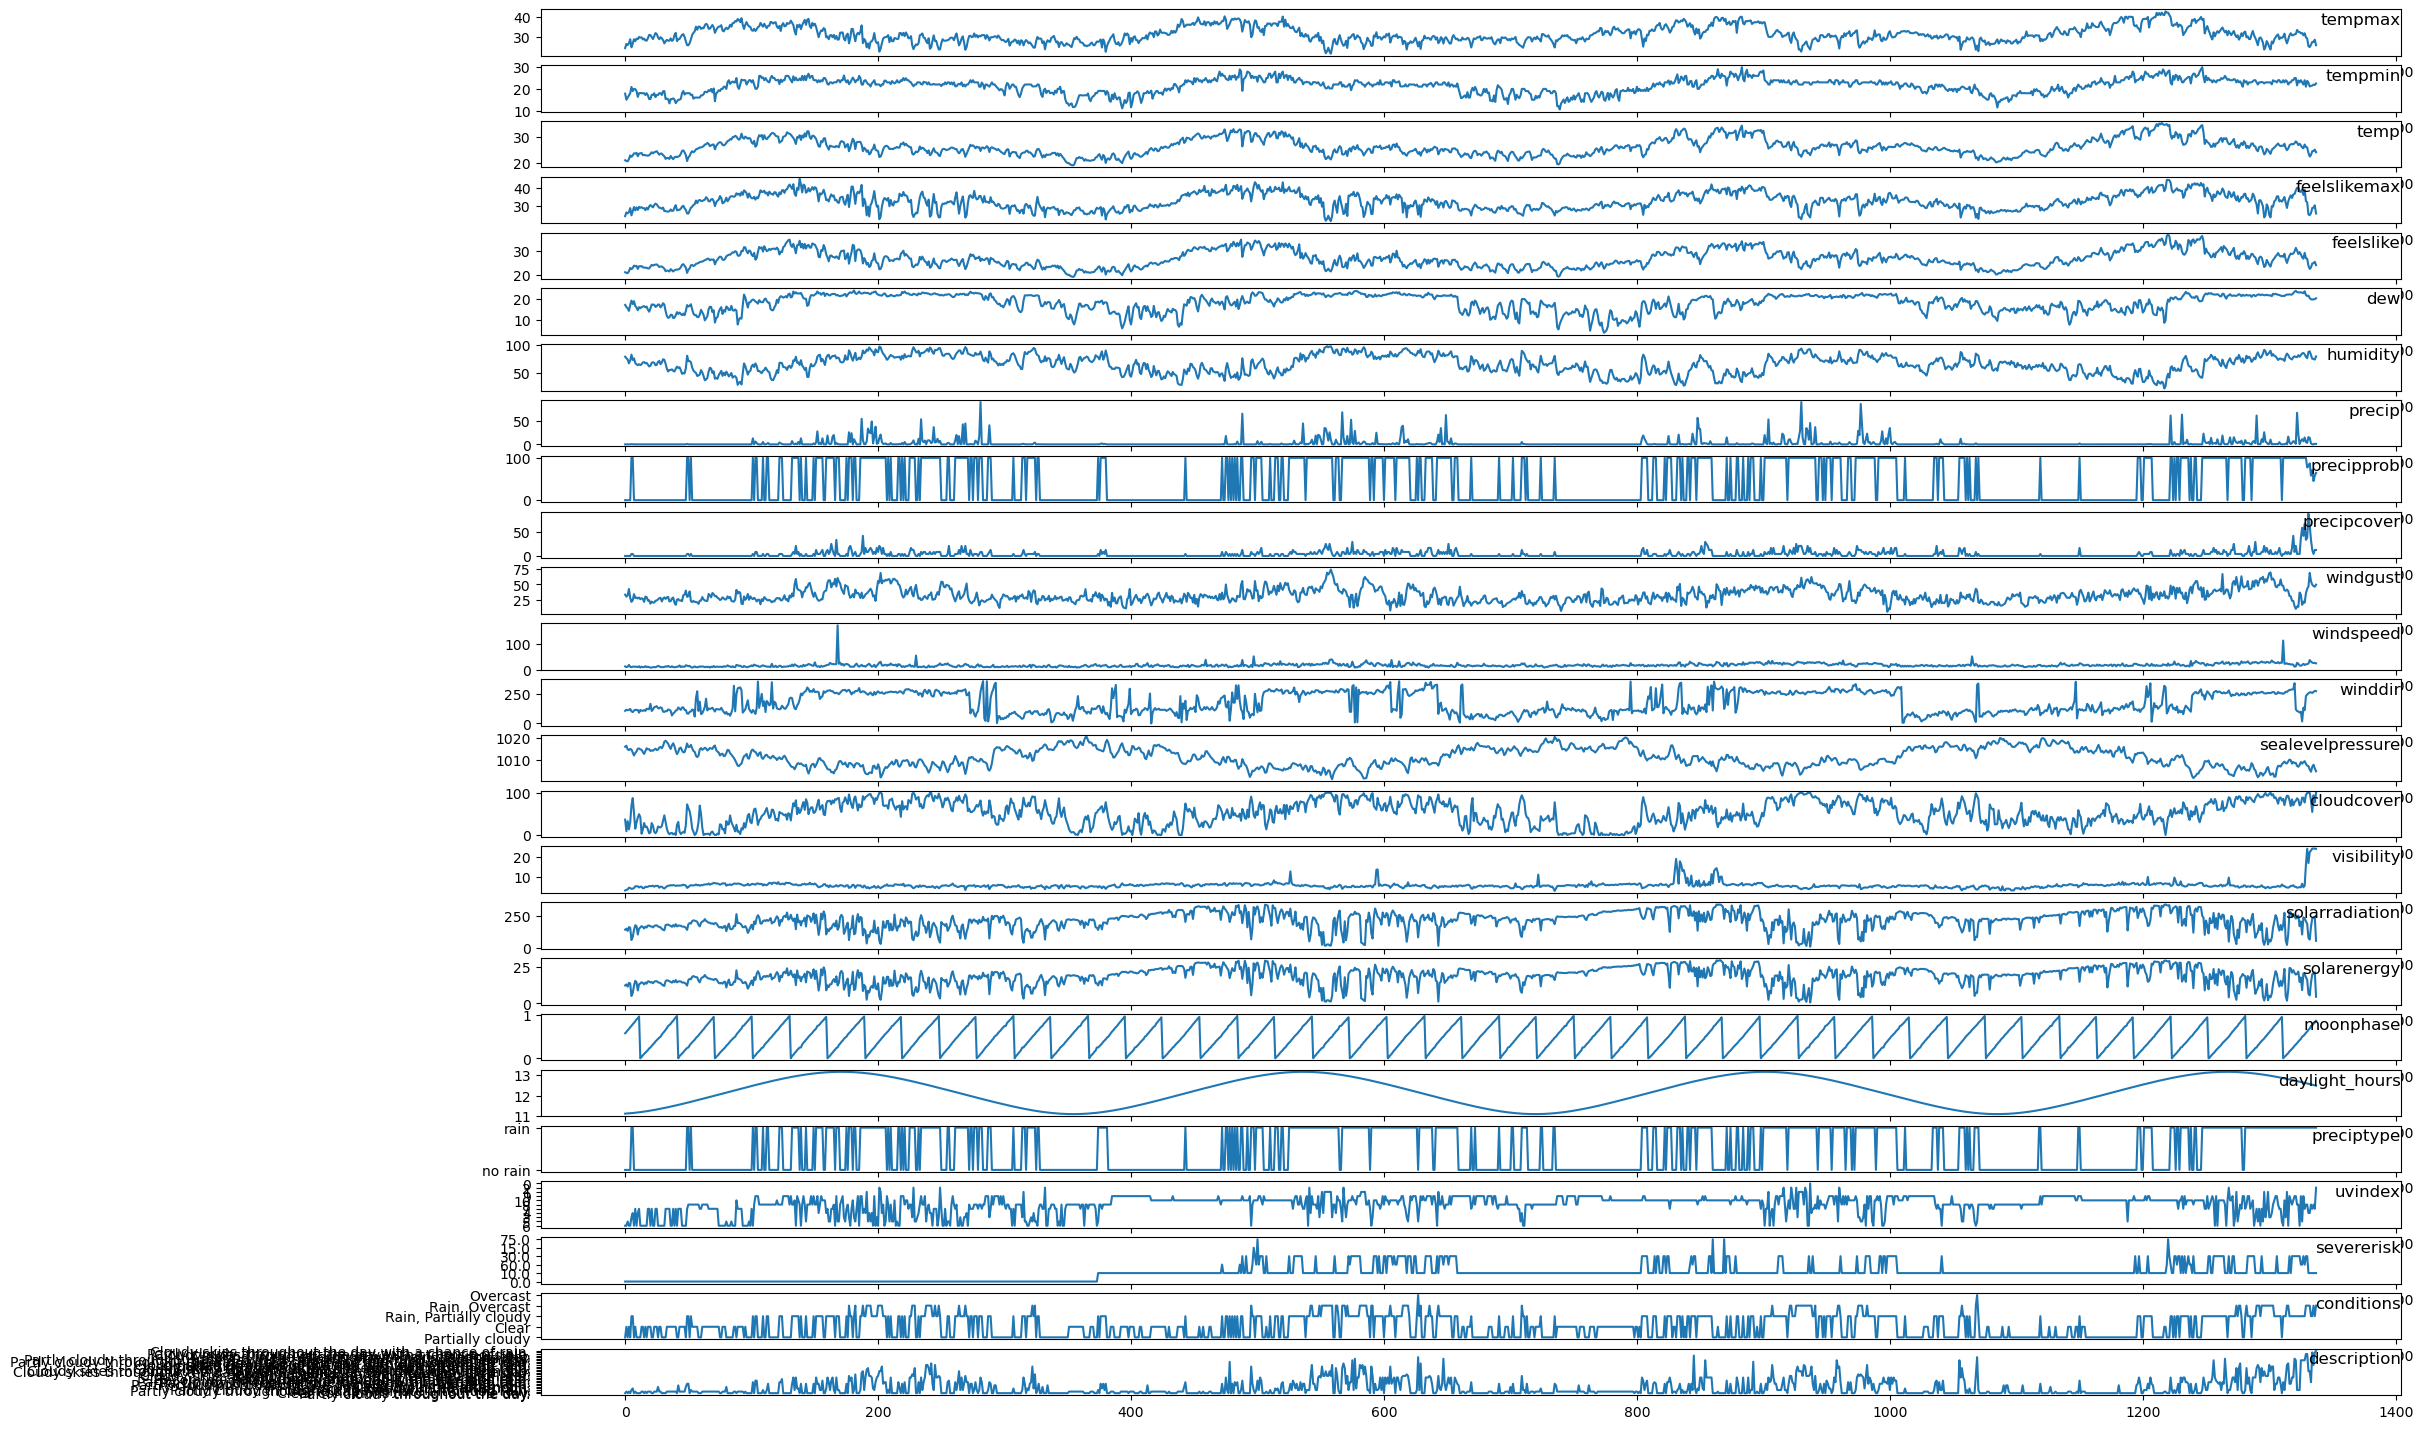

In [41]:
values = dataset_R.values
groups = [0, 1, 2, 3, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
i = 1
plt.figure(figsize=(24, 18))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset_R.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

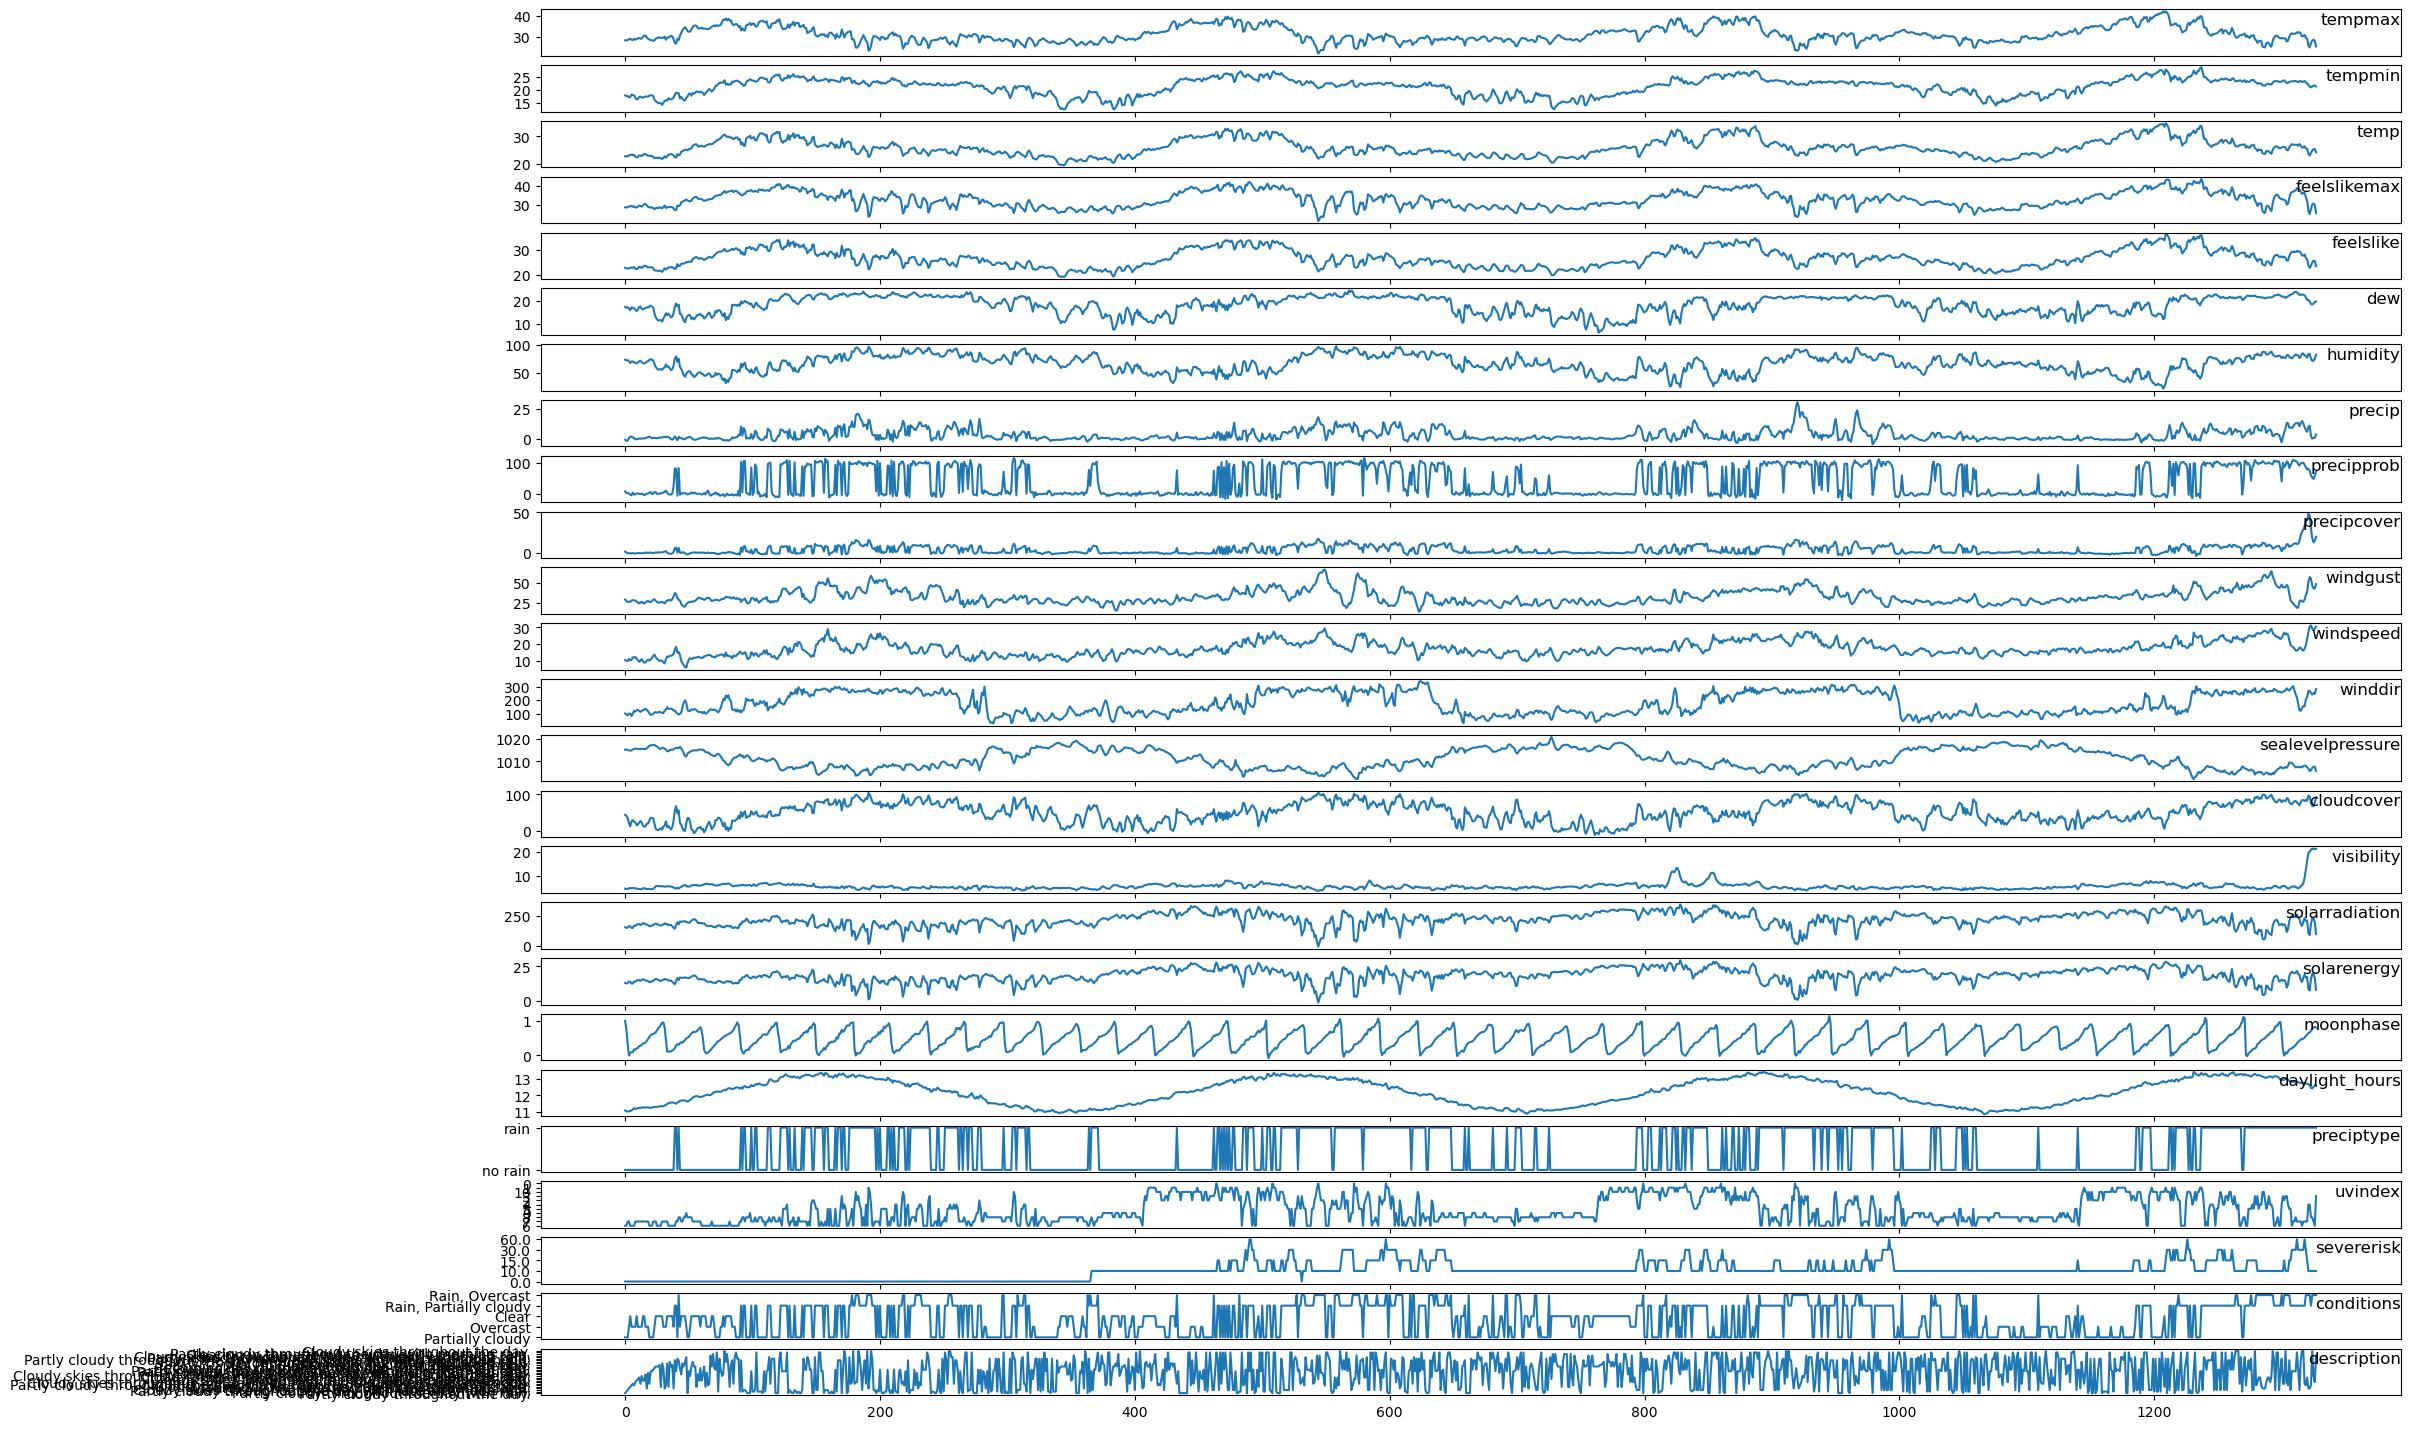

In [42]:
values = res.values
groups = [0, 1, 2, 3, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
i = 1
plt.figure(figsize=(24, 18))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(res.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [43]:
# Get the most recent 10 days of data as the initial input for forecasting
last_sequence = X_combined_scaled[-time_steps:]  # Shape: (time_steps, num_features)

# Initialize a list to store predictions
future_predictions = []


In [44]:

# Perform iterative forecasting for the next 10 days
for _ in range(10):  # Predicting for the next 10 days
    # Reshape the input to match the LSTM input shape
    input_data = last_sequence.reshape((1, time_steps, last_sequence.shape[1]))

    # Make a prediction
    next_day_prediction = model.predict(input_data)

    # Inverse transform the prediction to get it back to the original scale
    next_day_prediction = scaler.inverse_transform(next_day_prediction)

    # Append the prediction to the list
    future_predictions.append(next_day_prediction[0])

    # Update the sequence: remove the oldest day and add the new prediction
    last_sequence = np.vstack((last_sequence[1:], next_day_prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [45]:

# Convert predictions to a DataFrame for better readability
future_predictions_df = pd.DataFrame(future_predictions, columns=X_combined.columns)


In [46]:

# Handling categorical predictions as before
for col_idx, col_name in enumerate(X_cat.columns, start=len(X_num.columns)):
    predicted_cat = future_predictions_df.iloc[:, col_idx].values

    # Round and clip to ensure values fall within the valid label range
    predicted_cat_rounded = np.round(predicted_cat).astype(int)
    predicted_cat_rounded = np.clip(predicted_cat_rounded, 0, len(label_encoders[col_name].classes_) - 1)

    # Convert back to original categorical labels
    future_predictions_df[col_name] = label_encoders[col_name].inverse_transform(predicted_cat_rounded)


In [47]:

# The 'future_predictions_df' now contains the predicted weather data for the next 10 days.
future_predictions_df


,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,moonphase,daylight_hours,preciptype,uvindex,severerisk,conditions,description
0,23.287615,20.671715,23.159185,22.082098,22.159285,21.633133,20.179321,89.385376,7.253531,86.373283,21.500370,59.580544,32.014610,311.228607,1003.372009,103.268143,20.430984,14.522495,1.378718,0.745730,12.578137,rain,1,0.0,"Rain, Overcast",Cloudy skies throughout the day with a chance ...
1,28.587141,18.977499,24.178085,28.010015,18.793306,23.179951,16.105251,72.578621,13.454912,65.083046,-0.843763,25.395103,27.934875,162.085358,1015.510864,38.384598,14.581693,274.131531,21.511322,0.411972,12.575165,rain,10,15.0,Partially cloudy,Becoming cloudy in the afternoon with afternoo...
2,32.877792,14.822170,24.658354,28.459831,13.832031,22.680204,4.961850,37.718998,3.656796,26.881018,-7.520463,9.572541,21.793226,28.826324,1025.879883,-31.847208,13.548896,387.727386,30.873924,0.469257,12.311636,rain,0,15.0,Clear,Becoming cloudy in the afternoon with afternoo...
3,39.070614,11.995314,26.708708,30.803677,11.285528,24.343283,-3.078962,7.227700,-3.108789,-15.256983,-7.213593,-3.923852,14.232183,-46.550255,1032.651489,-91.514633,12.587701,470.343597,37.820465,0.660181,11.934649,no rain,0,15.0,Clear,Becoming cloudy in the afternoon with afternoo...
4,44.252239,12.570925,29.853168,34.124287,12.152236,27.026382,-6.721009,-14.060611,-5.685596,-42.338737,-5.637367,-10.328596,13.067870,-63.620766,1034.727783,-123.742950,12.994046,547.335022,43.760612,0.754957,11.876111,no rain,0,30.0,Clear,Becoming cloudy in the afternoon with afternoo...
5,46.259418,14.571218,31.967377,36.946285,14.620314,29.588715,-4.998724,-16.413769,-6.150201,-42.185867,-4.324350,-9.137264,14.894138,-36.210327,1034.917114,-121.556007,12.864567,569.917114,46.194382,0.831351,11.870050,no rain,0,60.0,Clear,Becoming cloudy in the afternoon with afternoo...
6,46.713112,15.878558,32.916763,37.611462,16.179430,30.656790,-3.874118,-16.067585,-7.109653,-39.211929,-2.765238,-6.455757,16.345196,-25.675533,1034.384155,-116.119934,12.567459,563.804077,46.173691,0.845467,11.780812,no rain,0,60.0,Clear,Becoming cloudy in the afternoon with afternoo...
7,46.633354,16.218840,33.098469,37.335758,16.594858,30.752333,-3.724080,-16.526403,-7.966411,-38.001995,-1.454746,-4.406866,17.177605,-27.179373,1034.455200,-114.107933,12.202867,559.590027,46.093422,0.843708,11.633468,no rain,0,60.0,Clear,Becoming cloudy in the afternoon with afternoo...
8,46.683849,16.290949,33.177551,37.031967,16.697294,30.704895,-3.963141,-17.860922,-8.451242,-38.513756,-0.424316,-3.400646,17.926115,-31.809338,1034.862671,-114.891907,12.104511,561.674927,46.318481,0.846729,11.520001,no rain,0,60.0,Clear,Becoming cloudy in the afternoon with afternoo...
9,46.854622,16.490488,33.344540,37.039673,16.903517,30.829779,-4.064329,-19.008785,-8.405048,-39.680538,0.079066,-2.884553,18.621691,-31.731256,1035.077515,-115.660202,12.132540,564.833496,46.569996,0.847118,11.457335,no rain,0,60.0,Clear,Becoming cloudy in the afternoon with afternoo...


In [48]:
import numpy as np

# Let's assume you already have your model trained and the scaler and encoders set up from the previous steps

# Get the most recent 10 days of data as the initial input for forecasting
last_sequence = X_combined_scaled[-time_steps:]  # Shape: (time_steps, num_features)

# Initialize a list to store predictions
future_predictions = []

# Perform iterative forecasting for the next 10 days
for _ in range(10):  # Predicting for the next 10 days
    # Reshape the input to match the LSTM input shape
    input_data = last_sequence.reshape((1, time_steps, last_sequence.shape[1]))

    # Make a prediction
    next_day_prediction = model.predict(input_data)

    # Inverse transform the prediction to get it back to the original scale
    next_day_prediction = scaler.inverse_transform(next_day_prediction)

    # Append the prediction to the list
    future_predictions.append(next_day_prediction[0])

    # Update the sequence: remove the oldest day and add the new prediction
    last_sequence = np.vstack((last_sequence[1:], next_day_prediction))

# Convert predictions to a DataFrame for better readability
future_predictions_df = pd.DataFrame(future_predictions, columns=X_combined.columns)

# Handling categorical predictions as before
for col_idx, col_name in enumerate(X_cat.columns, start=len(X_num.columns)):
    predicted_cat = future_predictions_df.iloc[:, col_idx].values

    # Round and clip to ensure values fall within the valid label range
    predicted_cat_rounded = np.round(predicted_cat).astype(int)
    predicted_cat_rounded = np.clip(predicted_cat_rounded, 0, len(label_encoders[col_name].classes_) - 1)

    # Convert back to original categorical labels
    future_predictions_df[col_name] = label_encoders[col_name].inverse_transform(predicted_cat_rounded)

# The 'future_predictions_df' now contains the predicted weather data for the next 10 days.
print(future_predictions_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
     tempmax    tempmin       temp  feelslikemax  feelslikemin  feelslike  \
0  23.287615  20.671715  23.159185     22.082098     22.159285  21.633133   
1  28.587141  18.977499  24.178085     28.010015     18.793306  23.179951   
2  32.877792  14.822170  24.658354     28.459831     13.832031  22.680204   
3  39.070614  11.995314  26.708708     30.803677     11.285528  24.343283   
4  44.252239  12.570925  29.853168     34.124287     12.152236  27.026382   
5  46.259418  14.571218  31.967377     36.946285     14.620314  29.588715   
6  46.713112  15.878558  32.916763     37.611462     16.179430  30.656790   
7  4

In [49]:
import pickle

In [50]:
# Replace 'model.pkl' with your desired filename
with open('model.pkl', 'wb') as f:
    pickle.dump(model,f)

In [51]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [52]:
# Save X_combined as a CSV file
X_combined.to_csv('X_combined.csv', index=False)

In [53]:
x = pd.read_csv("X_combined.csv")

In [54]:
x

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,moonphase,daylight_hours,preciptype,uvindex,severerisk,conditions,description
0,24.7,17.8,21.1,24.7,17.8,21.1,17.2,79.4,0.0,0.0,0.00,33.8,12.2,107.2,1016.0,36.5,3.0,140.6,12.2,0.58,11.109722,0,7,0,2,27
1,26.7,15.0,20.8,26.7,15.0,20.8,16.2,76.7,0.0,0.0,0.00,30.6,9.5,116.6,1016.4,9.1,3.3,149.0,12.9,0.61,11.114167,0,7,0,0,3
2,26.2,16.0,20.7,26.2,16.0,20.7,15.5,74.4,0.0,0.0,0.00,32.8,11.2,112.5,1014.8,32.8,3.5,131.2,11.4,0.65,11.118611,0,6,0,2,27
3,27.0,17.0,21.5,26.8,17.0,21.5,14.3,67.5,0.0,0.0,0.00,42.8,17.8,115.7,1014.5,13.4,4.4,161.5,14.0,0.68,11.123611,0,7,0,0,3
4,29.0,18.0,22.9,29.0,18.0,22.9,17.1,72.5,0.0,0.0,0.00,28.8,10.6,123.7,1015.0,30.0,4.2,155.4,13.5,0.72,11.129167,0,7,0,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,26.3,21.4,23.1,26.3,21.4,23.1,19.9,82.5,1.8,58.1,33.33,55.1,30.6,264.6,1004.9,81.9,23.1,164.0,14.1,0.75,12.550000,1,9,1,4,20
1334,27.7,21.5,24.5,29.1,21.5,24.8,19.8,75.7,0.4,71.0,12.50,49.7,27.0,259.1,1007.1,54.6,24.1,229.0,19.8,0.76,12.534722,1,8,1,4,19
1335,27.7,22.0,24.6,29.2,22.0,24.9,19.9,75.5,0.1,45.2,4.17,47.5,25.2,267.5,1008.0,94.0,24.1,232.4,20.1,0.80,12.519444,1,9,1,3,9
1336,28.8,21.8,25.1,30.5,21.8,25.5,20.0,74.2,1.2,58.1,12.50,46.4,25.9,276.9,1006.4,76.9,24.1,243.0,21.2,0.83,12.503889,1,8,1,4,19
